In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('try_data.csv')

In [4]:
df.shape

(6116, 17)

In [5]:
df.head()

,jobma_catcher_id,is_premium,jobma_catcher_is_deleted,jobma_verified,subscription_status,company_size,subscription_type,plan_type,is_unlimited,jobma_catcher_sub_accounts,subscription_amount,number_of_subscriptions,number_of_invitations,job_posted,number_of_kits,number_of_recorded_interviews,number_of_live_interviews
0,2656,0.0,NaN,1,1,1-25,0.0,0.0,1.0,0.0,15000.00,1.0,4.0,1.0,2.0,1.0,NaN
1,2935,0.0,NaN,1,2,26-100,0.0,1.0,0.0,0.0,53.10,1.0,NaN,NaN,NaN,NaN,NaN
2,2937,0.0,NaN,1,2,101-500,0.0,1.0,0.0,0.0,118.00,1.0,NaN,NaN,NaN,NaN,NaN
3,2938,0.0,NaN,1,1,26-100,0.0,1.0,0.0,0.0,15200.18,3.0,NaN,1.0,NaN,NaN,NaN
4,2939,0.0,NaN,1,2,26-100,0.0,1.0,0.0,0.0,11800.00,1.0,NaN,1.0,NaN,NaN,NaN


In [6]:
df.isnull().sum()

jobma_catcher_id                    0
is_premium                          1
jobma_catcher_is_deleted         6116
jobma_verified                      0
subscription_status                 0
company_size                      486
subscription_type                1655
plan_type                        1661
is_unlimited                     1736
jobma_catcher_sub_accounts       1654
subscription_amount              1654
number_of_subscriptions          1654
number_of_invitations            4972
job_posted                       4992
number_of_kits                   4936
number_of_recorded_interviews    5270
number_of_live_interviews        6076
dtype: int64

In [7]:
df.drop(['jobma_catcher_is_deleted', 'subscription_type'], axis=1, inplace=True)

# Specific Methods

In [9]:
def fill_mean(df, col):
    count = df[col].mean()
    df[col].fillna(count, inplace=True)

# is_premium

In [11]:
df['is_premium'].unique()

array([ 0.,  1., nan])

In [12]:
df['is_premium'].fillna(1.0, inplace=True)

In [13]:
df['is_premium'] = df['is_premium'].astype(int)

In [14]:
df['is_premium'].unique()

array([0, 1])

# company_size

In [16]:
df['company_size'].unique()

array(['1-25', '26-100', '101-500', '500-1000', nan, 'More than 1000'],
      dtype=object)

In [17]:
mode_value = df['company_size'].mode()[0]
df['company_size'].fillna(mode_value, inplace=True)

# plan_type

In [19]:
df['plan_type'].unique()

array([ 0.,  1., nan])

In [20]:
df['plan_type'].fillna(1.0, inplace=True)

In [21]:
df['plan_type'] = df['plan_type'].astype(int)

In [22]:
df['plan_type'].unique()

array([0, 1])

# is_unlimited

In [24]:
df['is_unlimited'].unique()

array([ 1.,  0., nan])

In [25]:
df['is_unlimited'].fillna(1.0, inplace=True)

In [26]:
df['is_unlimited'] = df['is_unlimited'].astype(int)

In [27]:
df['is_unlimited'].unique()

array([1, 0])

# jobma_catcher_sub_accounts

In [29]:
df['jobma_catcher_sub_accounts'].unique()

array([  0.,   4.,  nan,   1.,   9.,   2.,   3.,   5.,   6.,  23., 115.,
        24.,   7.,   8.,  11.,  12.,  14.,  10.,  15.])

In [30]:
df['jobma_catcher_sub_accounts'].fillna(0.0, inplace=True)

In [31]:
df['jobma_catcher_sub_accounts'] = df['jobma_catcher_sub_accounts'].astype(int)

In [32]:
df['jobma_catcher_sub_accounts'].unique()

array([  0,   4,   1,   9,   2,   3,   5,   6,  23, 115,  24,   7,   8,
        11,  12,  14,  10,  15])

# subscription_amount

In [34]:
df['subscription_amount'].isnull().sum()

1654

In [35]:
subscription_value = df['subscription_amount'].mean()

In [36]:
df['subscription_amount'].fillna(subscription_value, inplace=True)

In [37]:
df['subscription_amount'].dtype

dtype('float64')

In [38]:
df['subscription_amount'].isnull().sum()

0

# number_of_subscriptions

In [40]:
df['number_of_subscriptions'].unique()

array([  1.,   3.,   2.,  25.,  nan,   4.,   6.,   5.,  33.,  12.,   7.,
         9.,  22.,  23.,  16.,   8.,  14.,  17.,  10.,  11.,  18.,  19.,
        47.,  26.,  21.,  13.,  24., 116.,  29.,  15.,  28.,  20.,  27.,
        46.,  58.])

In [41]:
''' To fill missing values in column with mean '''

fill_mean(df, 'number_of_subscriptions')

In [42]:
df['number_of_subscriptions'] = df['number_of_subscriptions'].astype(int)

In [43]:
df['number_of_subscriptions'].unique()

array([  1,   3,   2,  25,   4,   6,   5,  33,  12,   7,   9,  22,  23,
        16,   8,  14,  17,  10,  11,  18,  19,  47,  26,  21,  13,  24,
       116,  29,  15,  28,  20,  27,  46,  58])

# number_of_invitations

In [45]:
df['number_of_invitations'].unique()

array([4.0000e+00,        nan, 4.8100e+02, 2.8000e+01, 1.0000e+00,
       5.0000e+00, 1.5000e+01, 2.0000e+00, 1.8000e+01, 3.0000e+00,
       1.7800e+02, 6.0000e+00, 5.3000e+01, 4.8500e+02, 2.5000e+01,
       1.6000e+01, 1.5900e+02, 1.9600e+02, 4.9000e+01, 5.1000e+01,
       2.9200e+02, 1.0000e+01, 1.4000e+01, 9.8000e+01, 7.6100e+02,
       1.1000e+01, 3.4300e+02, 1.0200e+02, 2.6100e+02, 5.2000e+01,
       3.9000e+01, 2.1000e+01, 1.2000e+01, 9.0000e+00, 1.9000e+01,
       5.1900e+02, 7.0000e+00, 3.7000e+01, 6.9000e+01, 2.2000e+01,
       1.1000e+02, 7.4000e+01, 8.0000e+00, 3.5000e+01, 5.9000e+01,
       3.8000e+01, 2.6700e+02, 8.4000e+01, 4.5000e+01, 7.3400e+02,
       1.2000e+02, 1.3000e+01, 7.8000e+01, 2.3000e+02, 6.1400e+02,
       8.3400e+02, 2.0000e+02, 9.1000e+01, 2.3000e+01, 7.5700e+02,
       1.4000e+02, 1.7000e+01, 1.3470e+03, 7.2300e+02, 1.3900e+02,
       8.3000e+01, 2.6000e+01, 2.7000e+01, 1.1720e+03, 9.4000e+01,
       5.0000e+01, 4.8700e+02, 2.9600e+02, 9.8300e+02, 3.0000e

In [46]:
''' To fill missing values in column with mean '''

fill_mean(df, 'number_of_invitations')

In [47]:
df['number_of_invitations'] = df['number_of_invitations'].astype(int)

In [48]:
df['number_of_invitations'].unique()

array([    4,    74,   481,    28,     1,     5,    15,     2,    18,
           3,   178,     6,    53,   485,    25,    16,   159,   196,
          49,    51,   292,    10,    14,    98,   761,    11,   343,
         102,   261,    52,    39,    21,    12,     9,    19,   519,
           7,    37,    69,    22,   110,     8,    35,    59,    38,
         267,    84,    45,   734,   120,    13,    78,   230,   614,
         834,   200,    91,    23,   757,   140,    17,  1347,   723,
         139,    83,    26,    27,  1172,    94,    50,   487,   296,
         983,    30,   499,   217,   315,    96,   295,   324,    33,
         780,  1204,    67,   389,    20,   444,    24,    75,    47,
         337,   144,    29,    36,    34,    43,    60,   184,    32,
         392,    57,    40,    66,   518,   436,    55,  1465,   106,
          56,    54,   162,    44,    62,   312,   390,    70,    31,
          61,   241,   246,   131, 50046,   572,    73,    81,   422,
         240,   137,

# job_posted

In [50]:
df['job_posted'].unique()

array([  1.,  nan,   2.,  36.,   5.,   3.,   6.,  92.,   9.,   4.,  37.,
        24.,   7.,  13.,  11.,  14.,  12.,  89.,  10.,   8.,  21.,  26.,
        17., 156.,  41.,  16., 189.,  40.,  33.,  51.,  45.,  69.,  75.,
        28.,  19., 117.,  20., 181.,  18., 179.,  34.,  22.,  44.,  15.,
        42.,  23.,  27.,  35.,  30.,  53.,  50.])

In [51]:
''' To fill missing values in column with mean '''

fill_mean(df, 'job_posted')

In [52]:
df['job_posted'] = df['job_posted'].astype(int)

In [53]:
df['job_posted'].unique()

array([  1,   4,   2,  36,   5,   3,   6,  92,   9,  37,  24,   7,  13,
        11,  14,  12,  89,  10,   8,  21,  26,  17, 156,  41,  16, 189,
        40,  33,  51,  45,  69,  75,  28,  19, 117,  20, 181,  18, 179,
        34,  22,  44,  15,  42,  23,  27,  35,  30,  53,  50])

In [54]:
df['job_posted'].isnull().sum()

0

# number_of_kits

In [56]:
df['number_of_kits'].unique()

array([  2.,  nan,   8.,   4.,   1.,   3.,  27.,   5.,  17.,  71.,   6.,
        31.,  13., 124.,  29.,   7.,  41.,  80.,  15.,  75.,   9., 197.,
       151.,  18.,  11.,  20.,  67.,  82.,  42.,  23.,  19.,  36.,  90.,
        40.,  22.,  25.,  10.,  14.,  16.,  99.,  66.,  48., 292., 114.,
       116.,  12.,  39.,  60., 103.,  26.,  57.,  24., 162.,  32.,  28.,
        64.,  68.])

In [57]:
df['number_of_kits'].dtype

dtype('float64')

In [58]:
df['number_of_kits'].fillna(0.0, inplace=True)

In [59]:
df['number_of_kits'] = df['number_of_kits'].astype(int)

In [60]:
df['number_of_kits'].dtype

dtype('int32')

In [61]:
df['number_of_kits'].unique()

array([  2,   0,   8,   4,   1,   3,  27,   5,  17,  71,   6,  31,  13,
       124,  29,   7,  41,  80,  15,  75,   9, 197, 151,  18,  11,  20,
        67,  82,  42,  23,  19,  36,  90,  40,  22,  25,  10,  14,  16,
        99,  66,  48, 292, 114, 116,  12,  39,  60, 103,  26,  57,  24,
       162,  32,  28,  64,  68])

# number_of_recorded_interviews    

In [63]:
df['number_of_recorded_interviews'].unique()

array([  1.,  nan,  40.,   2.,   3., 215.,   7.,   9.,   4.,  46.,  10.,
         8.,  13.,  11.,   5.,  14., 203.,   6.,  38.,  32.,  37., 154.,
        19.,  34., 396.,  67.,  31., 151., 375., 384.,  12., 156.,  39.,
       328., 102.,  22., 449., 470.,  15.,  47., 481.,  58.,  59.,  27.,
        26., 183.,  92., 468.,  16., 298., 124., 178.,  54.,  28.,  33.,
        29., 635., 549.,  18., 111.,  25., 348.,  49.,  73.,  21., 201.,
       112., 162.,  43.,  74., 181., 135., 441.,  85.,  24., 188., 206.,
        51.,  17.,  44.,  57.,  35.,  45.,  20., 270.,  48., 255.,  41.,
       136.,  68.,  77., 103.])

In [64]:
df['number_of_recorded_interviews'].fillna(0.0, inplace=True)

In [65]:
df['number_of_recorded_interviews'] = df['number_of_recorded_interviews'].astype(int)

In [66]:
df['number_of_recorded_interviews'].unique()

array([  1,   0,  40,   2,   3, 215,   7,   9,   4,  46,  10,   8,  13,
        11,   5,  14, 203,   6,  38,  32,  37, 154,  19,  34, 396,  67,
        31, 151, 375, 384,  12, 156,  39, 328, 102,  22, 449, 470,  15,
        47, 481,  58,  59,  27,  26, 183,  92, 468,  16, 298, 124, 178,
        54,  28,  33,  29, 635, 549,  18, 111,  25, 348,  49,  73,  21,
       201, 112, 162,  43,  74, 181, 135, 441,  85,  24, 188, 206,  51,
        17,  44,  57,  35,  45,  20, 270,  48, 255,  41, 136,  68,  77,
       103])

# number_of_live_interviews

In [68]:
df['number_of_live_interviews'].unique()

array([ nan,   4.,   1.,   8.,  18.,   2.,  13., 225.,  29.,  26.,   3.,
         5.,   6.])

In [69]:
df['number_of_live_interviews'].fillna(0.0, inplace=True)

In [70]:
df['number_of_live_interviews'] = df['number_of_live_interviews'].astype(int)

In [71]:
df['number_of_live_interviews'].unique()

array([  0,   4,   1,   8,  18,   2,  13, 225,  29,  26,   3,   5,   6])

In [72]:
df.isnull().sum()

jobma_catcher_id                 0
is_premium                       0
jobma_verified                   0
subscription_status              0
company_size                     0
plan_type                        0
is_unlimited                     0
jobma_catcher_sub_accounts       0
subscription_amount              0
number_of_subscriptions          0
number_of_invitations            0
job_posted                       0
number_of_kits                   0
number_of_recorded_interviews    0
number_of_live_interviews        0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jobma_catcher_id               6116 non-null   int64  
 1   is_premium                     6116 non-null   int32  
 2   jobma_verified                 6116 non-null   int64  
 3   subscription_status            6116 non-null   int64  
 4   company_size                   6116 non-null   object 
 5   plan_type                      6116 non-null   int32  
 6   is_unlimited                   6116 non-null   int32  
 7   jobma_catcher_sub_accounts     6116 non-null   int32  
 8   subscription_amount            6116 non-null   float64
 9   number_of_subscriptions        6116 non-null   int32  
 10  number_of_invitations          6116 non-null   int32  
 11  job_posted                     6116 non-null   int32  
 12  number_of_kits                 6116 non-null   i

# Checking for Outliers

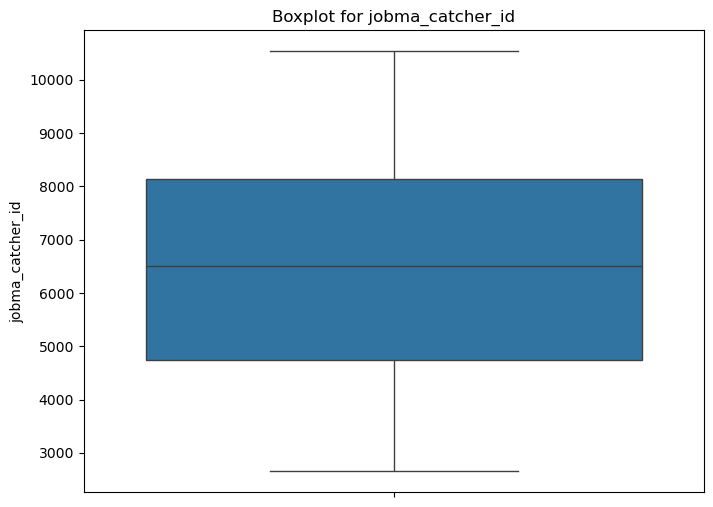

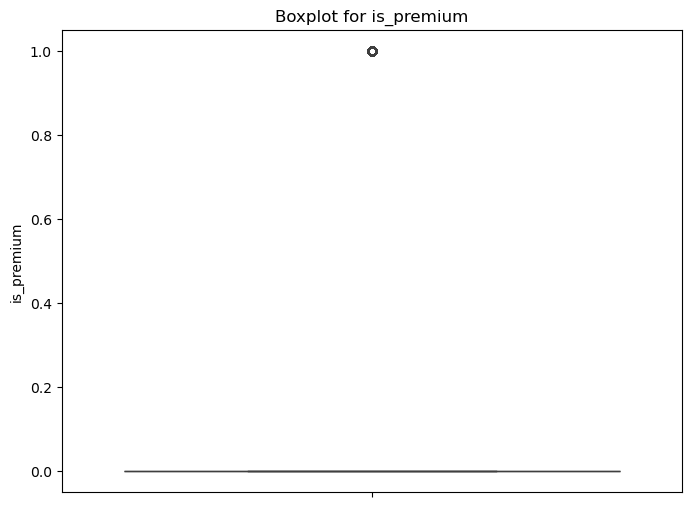

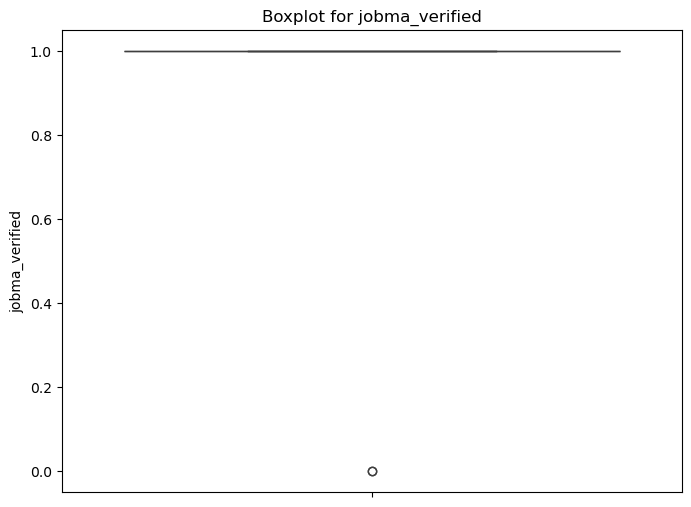

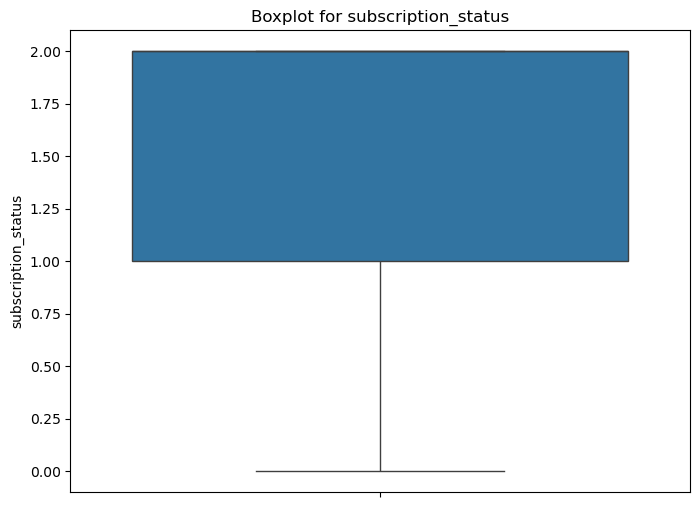

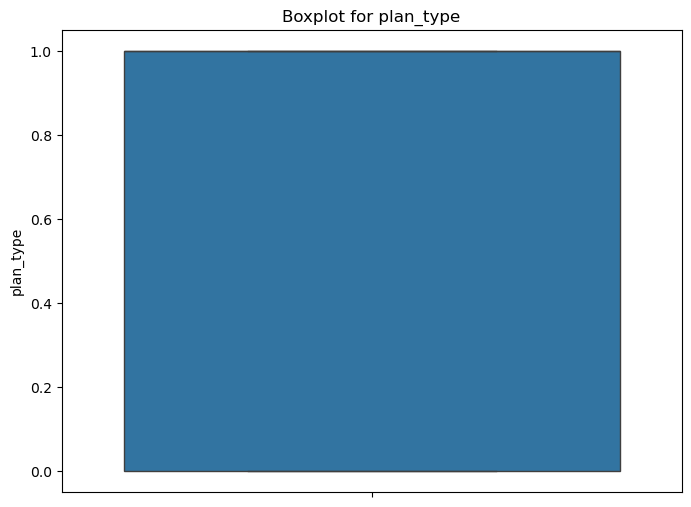

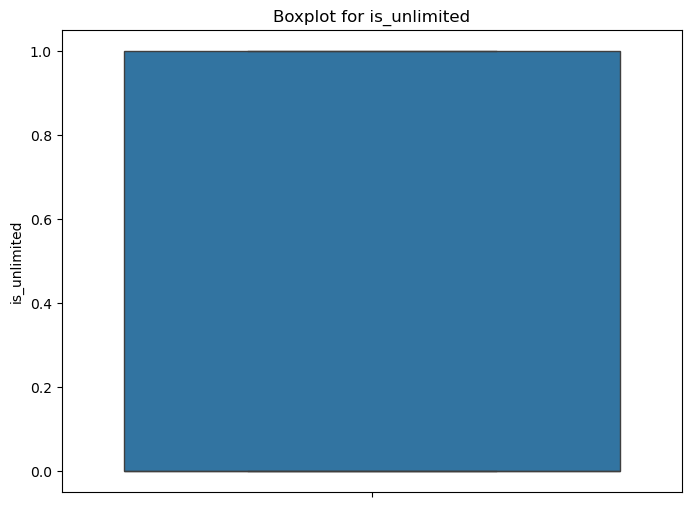

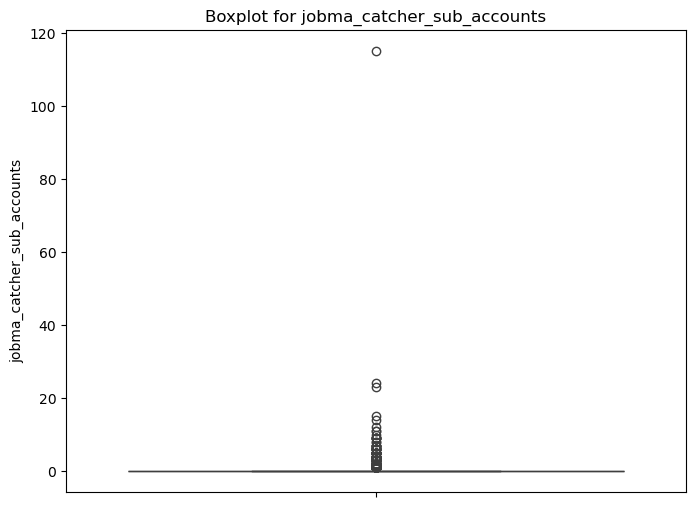

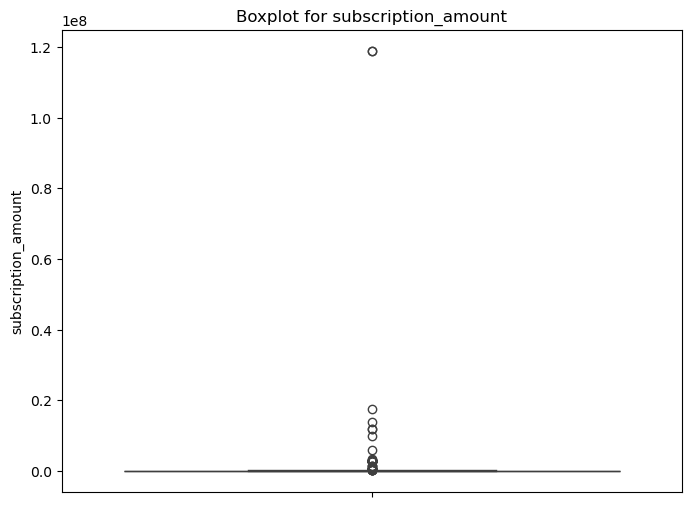

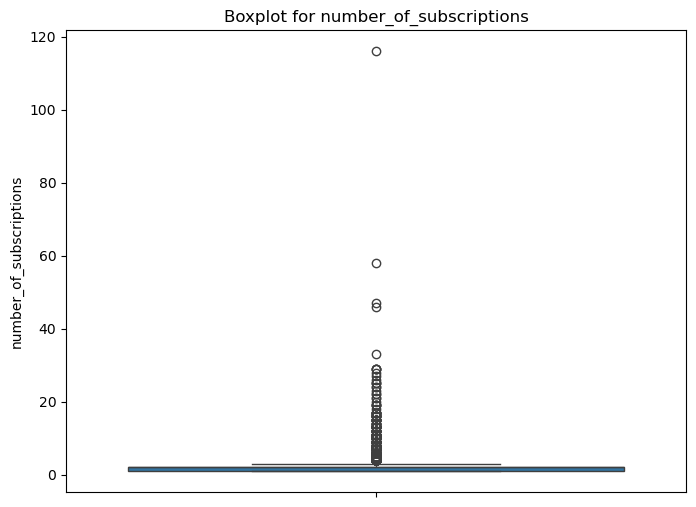

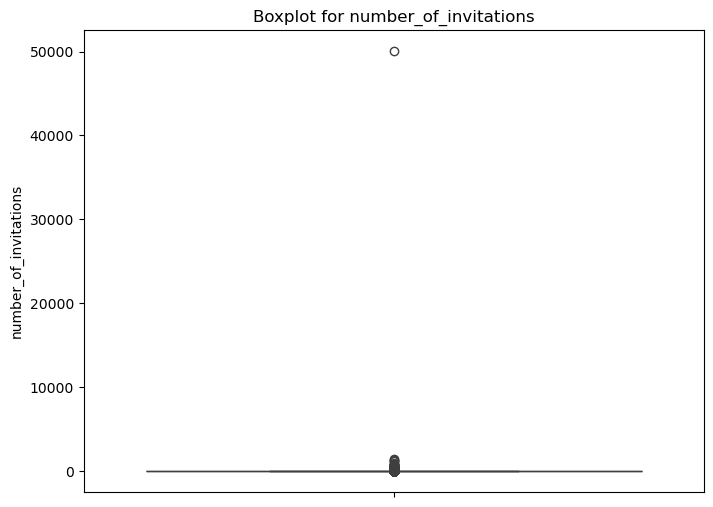

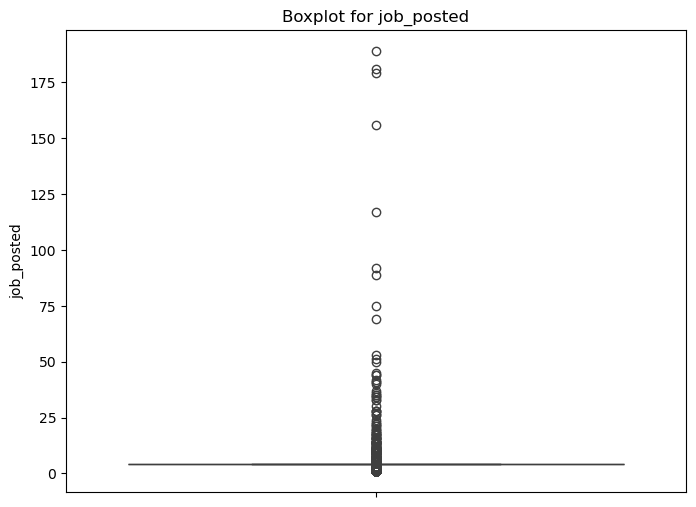

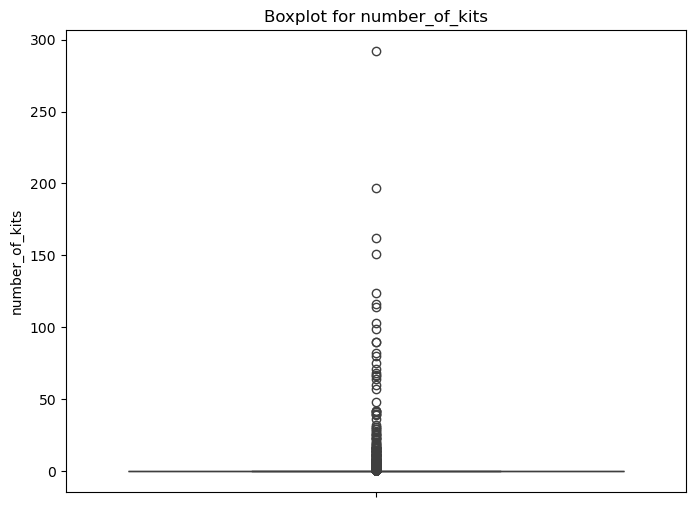

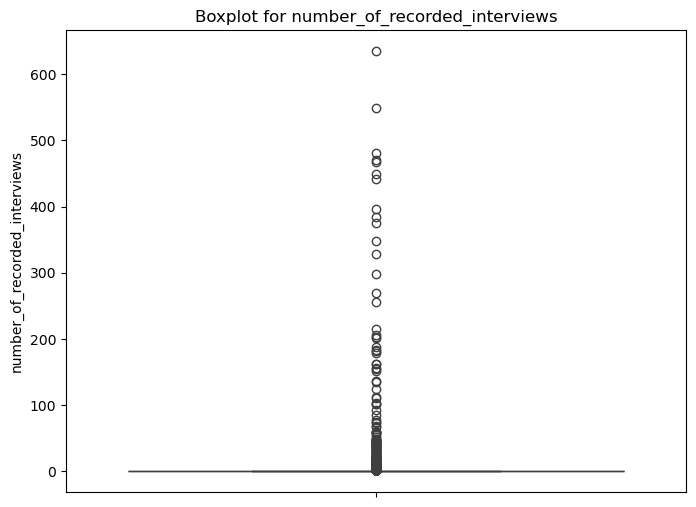

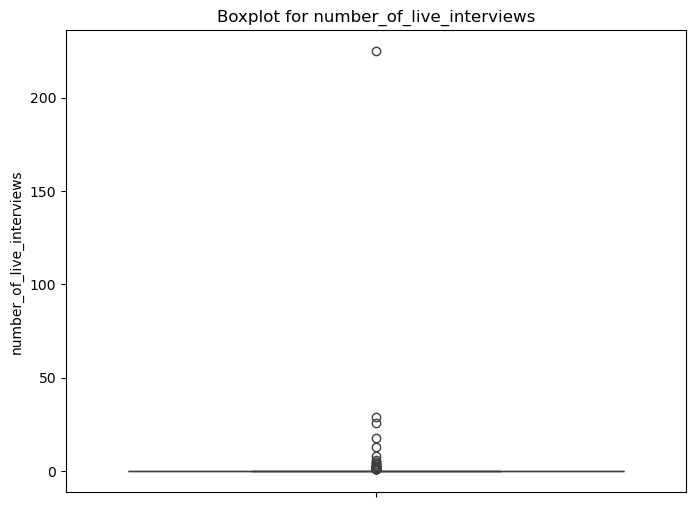

In [75]:
''' Checking for Outliers '''

for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Exporting

In [142]:
df.to_csv("try_data_processed.csv", index=False)